# Analisis Saham BCA, Bank Mandiri, BNI, dan BRI
Halo... selamat datang, dalam proyek ini akan dilakukan proses analisa terhadap beberapa saham perbankan di Indonesia. Saham perbankan yang akan saya analisis adalah saham dari perusahaan BCA (Kode Saham: BBCA), Bank Mandiri (Kode Saham: BMRI), BNI (Kode Saham: BBNI), dan BRI (Kode Saham: BBRI). Selain itu saya juga akan menggunakan data pergerakan indeks harga-harga saham disektor finance (Kode Indeks: JKFINA). Proyek ini akan menggali berbagai informasi dan memvisualisasikannya berdasarkan harga penutupan saham secara harian. Risiko setiap saham juga akan dianalisis berdasarkan kinerja sebelumnya dan akan dilakukan prediksi terhadap saham-saham tersebut di masa depan dengan menggunakan Metode Monte Carlo.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import pandas_datareader as web

from datetime import datetime

from __future__ import division

## Informasi Saham
Berikut data harga penutupan saham BBCA, BMRI, BBNI, BBRI, dan indeks JKFINA secara harian bersumber dari finance.yahoo.com.

In [2]:
fin_list = ['BBCA.JK', 'BMRI.JK', 'BBNI.JK', 'BBRI.JK']

end_time = datetime.now()
start_time = datetime(end_time.year-1,end_time.month,end_time.day)

closing_stocks = web.DataReader(fin_list,'yahoo',start_time,end_time)['Adj Close']
JKFINA = web.DataReader('^JKFINA', data_source='yahoo', start=start_time, end=end_time)
for stock in fin_list:
    globals()[stock[0:4]] = web.DataReader(stock, data_source='yahoo', start=start_time, end=end_time)

code_all = ['BBCA', 'BMRI', 'BBNI', 'BBRI','JKFINA']
code_fin = ['BBCA', 'BMRI', 'BBNI', 'BBRI']

closing_prices = closing_stocks.copy()
closing_prices['JKFINA'] = JKFINA[['Adj Close']]
closing_prices.columns = code_all
closing_prices

,BBCA,BMRI,BBNI,BBRI,JKFINA
Date,,,,,
2019-12-13,31165.201172,7020.456055,7425.410156,4119.307129,1313.750000
2019-12-16,31165.201172,6996.657715,7473.942383,4167.429688,1318.530029
2019-12-17,31851.228516,6996.657715,7473.942383,4186.678711,1328.959961
2019-12-18,33100.777344,7163.245117,7595.272461,4234.801758,1355.800049
2019-12-19,32341.246094,7234.639160,7595.272461,4186.678711,1345.839966
...,...,...,...,...,...
2020-12-07,32501.546875,6700.000000,6650.000000,4400.000000,1332.650024
2020-12-08,32352.000000,6675.000000,6650.000000,4400.000000,1329.550049
2020-12-09,32450.000000,6675.000000,6650.000000,4400.000000,NaN


Berikut data volume perdagangan (jumlah lembar saham yang diperdagangkan) saham BBCA, BMRI, BBNI, dan BBRI secara harian bersumber dari finance.yahoo.com.

In [3]:
volume_stocks = web.DataReader(fin_list,'yahoo',start_time,end_time)['Volume']
volume_stocks.columns = code_fin
volume_stocks

,BBCA,BMRI,BBNI,BBRI
Date,,,,
2019-12-13,14164500.0,63736200.0,24452000.0,167616600.0
2019-12-16,15736800.0,48018700.0,29977800.0,178955500.0
2019-12-17,20582900.0,50395000.0,22594100.0,141046900.0
2019-12-18,36360800.0,61640800.0,42197000.0,158345700.0
2019-12-19,14834200.0,56451600.0,19300400.0,94017600.0
...,...,...,...,...
2020-12-07,19327200.0,66792900.0,60637400.0,140849600.0
2020-12-08,14112300.0,35175200.0,35168700.0,81272000.0
2020-12-09,0.0,0.0,0.0,0.0


Grafik pergerakan harga saham BBCA, BMRI, BBNI, BBRI, dan indeks JKFINA berdasarkan harga penutupan.

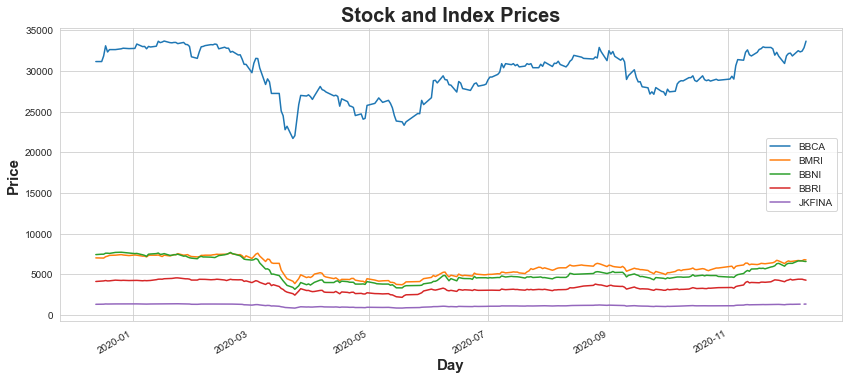

In [4]:
closing_prices.plot(legend=True, figsize=(14,6))
plt.xlabel('Day', weight='bold', fontsize=15)
plt.ylabel('Price', weight='bold', fontsize=15)
plt.title('Stock and Index Prices', weight='bold', fontsize=20)
plt.show()

Grafik pergerakan harga saham BBCA, BMRI, BBNI, BBRI, dan indeks JKFINA berdasarkan harga penutupan dengan skala logaritmik.

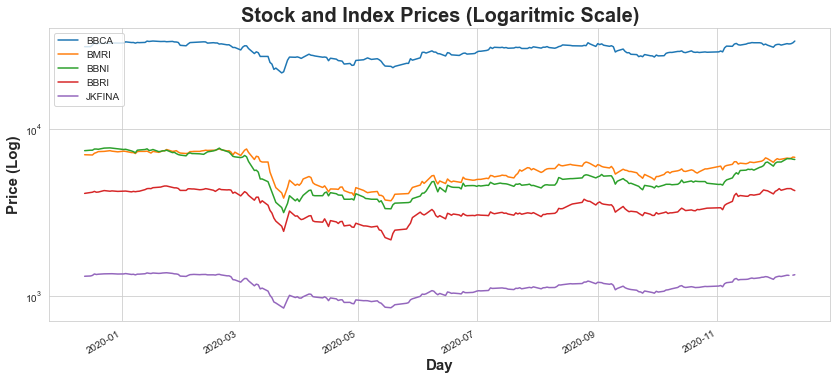

In [5]:
closing_prices.plot(legend=True, figsize=(14,6))
plt.yscale('log')
plt.xlabel('Day', weight='bold', fontsize=15)
plt.ylabel('Price (Log)', weight='bold', fontsize=15)
plt.title('Stock and Index Prices (Logaritmic Scale)', weight='bold', fontsize=20)
plt.show()

Pada grafik diatas menunjukan bahwa pergerakan saham-saham tersebut cenderung identik dengan pergerakan indeksnya (JKFINA). Selanjutnya dibawah ini merupakan grafik pergerakan volume perdagangan saham BBCA, BMRI, BBNI, dan BBRI.

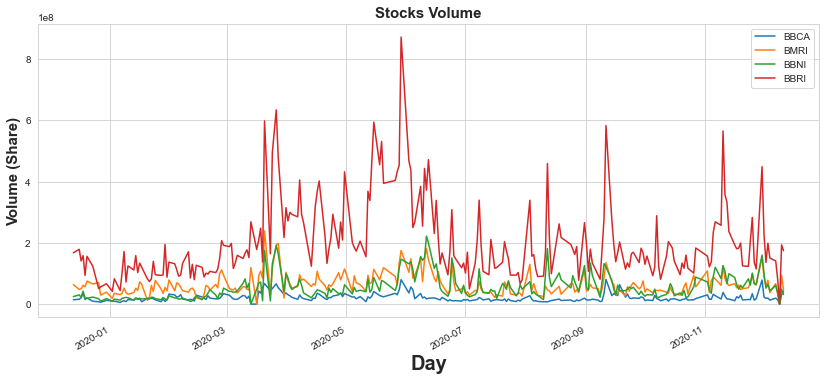

In [6]:
volume_stocks.plot(legend=True, figsize=(14,6))
plt.xlabel('Day', weight='bold', fontsize=20)
plt.ylabel('Volume (Share)', weight='bold', fontsize=15)
plt.title('Stocks Volume', weight='bold', fontsize=15)
plt.show()

Volume perdagangan suatu saham dapat menentukan likuiditas saham tersebut. Pada grafik diatas terlihat bahwa saham yang memiliki volume perdagangan yang tinggi adalah saham BBRI. Hal ini bisa terjadi karena saham BBRi memiliki kecenderungan harga yang lebih rendah dari saham lain sehingga dengan modal yang sama kita dapat membeli/ menjual saham BBRI dengan jumlah lembar yang lebih banyak dibandingkan saham BBCA yang memiliki harga jauh lebih tinggi.

Selanjutnya untuk melihat trend suatu saham akan dilakukan visualisasi dengan menggunakan indikator Moving Average atau MA(n) yaitu indikator teknikal yang merata-ratakan harga n hari sebelumnya dan menghubungkannya menjadi sebuah garis. Pada grafik dibawah ini akan digunakan MA(5), MA(20), MA(60). MA(5) untuk menggambarkan rata-rata mingguannya, MA(20) rata-rata bulanannya, dan MA(60) rata-rata 3 bulan (kuartal).

In [7]:
ma_day = [5,20,60]

for stock in code_fin:
    col_ma = []
    for ma in ma_day:
        column_name = 'MA for %s days' %(str(ma))
        col_ma.append(column_name)
        globals()[stock][column_name] = globals()[stock]['Adj Close'].rolling(ma).mean()

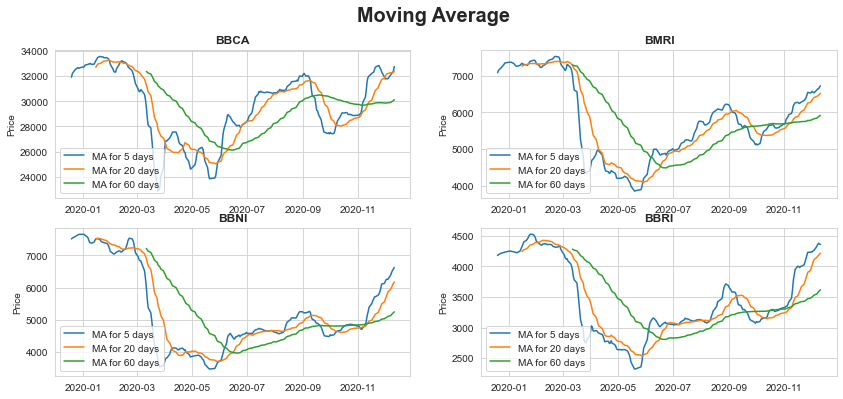

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(14,6))
sb = [ax1, ax2, ax3, ax4]
plt.suptitle('Moving Average', weight='bold', fontsize=20)
for k in range(4):
    sb[k].plot(globals()[code_fin[k]][col_ma])
    sb[k].set_title(code_fin[k], weight='bold')
    sb[k].legend(col_ma,loc="lower left")

for m in sb:
    m.set(ylabel='Price')

Dari grafik MA diatas terlihat bahwa pada hari terakhir kondisi MA terendahnya telah memotong MA yang lebih tinggi dari bawah. Hal ini menunjukkan bahwa saham-saham diatas sedang dalam trend naik/ uptrend.

## Daily Return Analysis
Data daily return saham BBCA, BMRI, BBNI, BBRI, dan indeks JKFINA secara harian berdasarkan harga penutupan.

In [9]:
fin_rets = closing_prices.pct_change()

for stock in code_all:
        globals()[stock]['Daily Return'] = fin_rets[stock]

fin_rets

,BBCA,BMRI,BBNI,BBRI,JKFINA
Date,,,,,
2019-12-13,NaN,NaN,NaN,NaN,NaN
2019-12-16,0.000000,-0.003390,0.006536,0.011682,0.003638
2019-12-17,0.022013,0.000000,0.000000,0.004619,0.007910
2019-12-18,0.039231,0.023810,0.016234,0.011494,0.020196
2019-12-19,-0.022946,0.009967,0.000000,-0.011364,-0.007346
...,...,...,...,...,...
2020-12-07,0.020344,0.015152,0.047244,0.023256,0.018262
2020-12-08,-0.004601,-0.003731,0.000000,0.000000,-0.002326
2020-12-09,0.003029,0.000000,0.000000,0.000000,0.000000


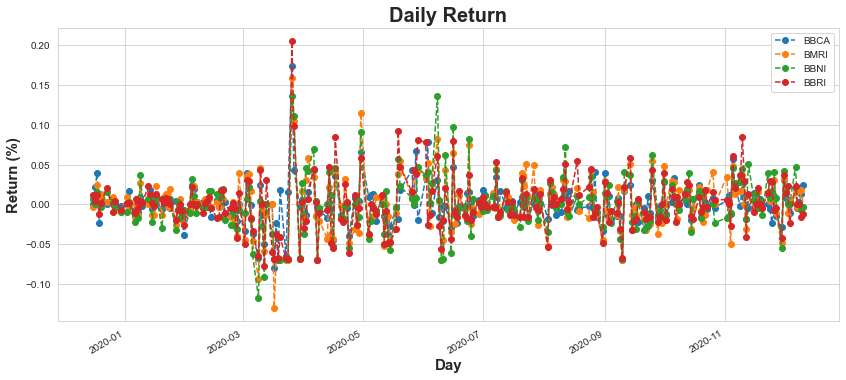

In [10]:
fin_rets[code_fin].plot(figsize=(14,6),legend=True,linestyle='--', marker='o')
plt.xlabel('Day', weight='bold', fontsize=15)
plt.ylabel('Return (%)', weight='bold', fontsize=15)
plt.title('Daily Return', weight='bold', fontsize=20)
plt.show()

Daily Return atau tingkat pengembalian harian harga suatu saham/ indeks diatas terlihat bahwa dari pertengahan bulan Maret sampai sekarang tidak ada penurunan harga saham dibawah 7%. Hal ini dikarenakan BEI (Bursa Efek Indonesia) sejak tanggal 13 Maret 2020 mengubah ketentuan ARB (Auto Reject Bawah) menjadi 7% sehingga harga saham tidak bisa turun lebih dari 7% dalam sehari. Kebijakan ini ditetapkan karena tekanan yang dirasakan IHSG (Indeks Harga Saham Gabungan) akibat meluasnya virus korona (Covid-19) yang telah menjadi pandemi. Selanjutnya dibawah ini merupakan visualisasi lain dari daily return saham menggunakan histogram.

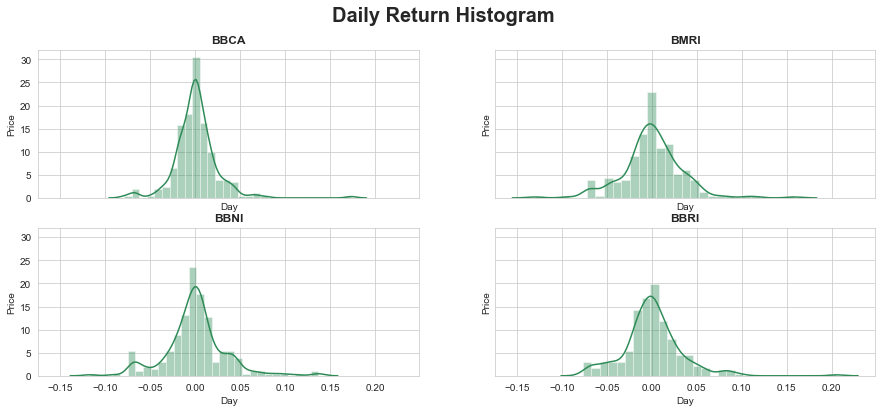

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,6), sharex=True, sharey=True)
sb = [ax1, ax2, ax3, ax4]

for g in range(4):
    sns.distplot( fin_rets[code_fin[g]], bins= 30, color="seagreen", ax=sb[g])
    sb[g].set_title(code_fin[g], weight='bold')

for m in sb:
    m.set(ylabel='Price', xlabel='Day')

plt.suptitle('Daily Return Histogram', weight='bold', fontsize=20)
plt.show()

In [12]:
rets_sum = pd.DataFrame({'Stock' : code_all})
rets_sum['Return Mean (%)'] = [fin_rets[stock].mean()*100 for stock in code_all]
rets_sum['Max Return (%)'] = [fin_rets[stock].max()*100 for stock in code_all]
rets_sum['Max Return (%)'] = [fin_rets[stock].min()*100 for stock in code_all]
rets_sum['Std Return'] = [fin_rets[stock].std() for stock in code_all]
rets_sum

,Stock,Return Mean (%),Max Return (%),Std Return
0,BBCA,0.060755,-7.913672,0.024204
1,BMRI,0.040190,-12.992126,0.033271
2,BBNI,0.006434,-11.718750,0.033911
3,BBRI,0.069576,-7.672634,0.033188
4,JKFINA,0.029775,-6.689893,0.020659


Berdasarkan histogram dan dataframe diatas terlihat bahwa keempat saham memiliki rata-rata daily return yang positif  dan lebih besar dibanding daily return indeksnya yaitu JKFINA. Daily return tertinggi dimiliki saham BBRI kemudian disusul oleh BBCA.

Selanjutnya akan dibandingkan persentase daily return dari dua saham untuk memeriksa seberapa berkorelasi kedua saham tersebut. 
Sebelum mencoba membandingkan dengan saham lain, pertama kita coba bandingkan dengan dirinya sendiri.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


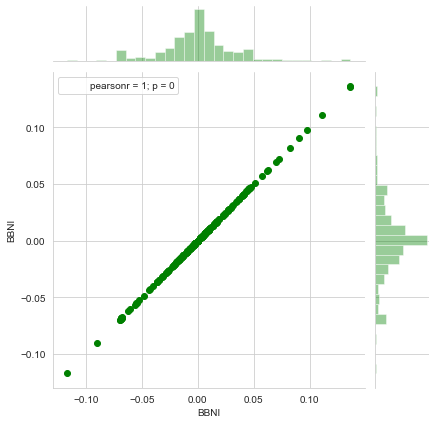

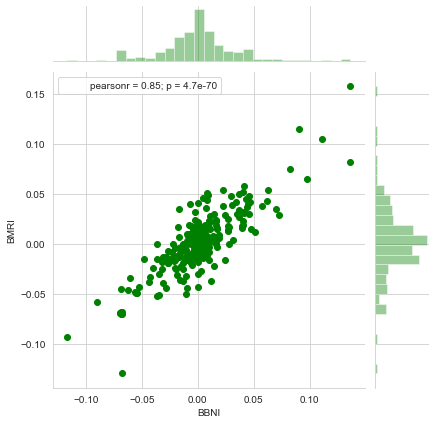

In [13]:
import scipy.stats as sci
list1 = ['BBNI', 'BMRI']
for g in range(2):
    sns.jointplot(list1[0], list1[g], fin_rets, kind='scatter', color='green').annotate(sci.pearsonr)

Pada grafik diatas terlihat bahwa ketika suatu saham di bandingkan dengan dirinya sendiri, maka saham tersebut akan berkorelasi positif sempurna (korelasi pearson bernilai satu) yang membentuk hubungan linear. Kemudian ketika saham tersebut diabndingkan dengan saham lainnya contohnya BMRI dan BBNI hasilnya bekorelasi positif dengan nilai korelasi pearson sebesar 0.85. Untuk melihat bagaimana korelasi saham-saham yang lain dapat dilihat seperti dibawah ini.

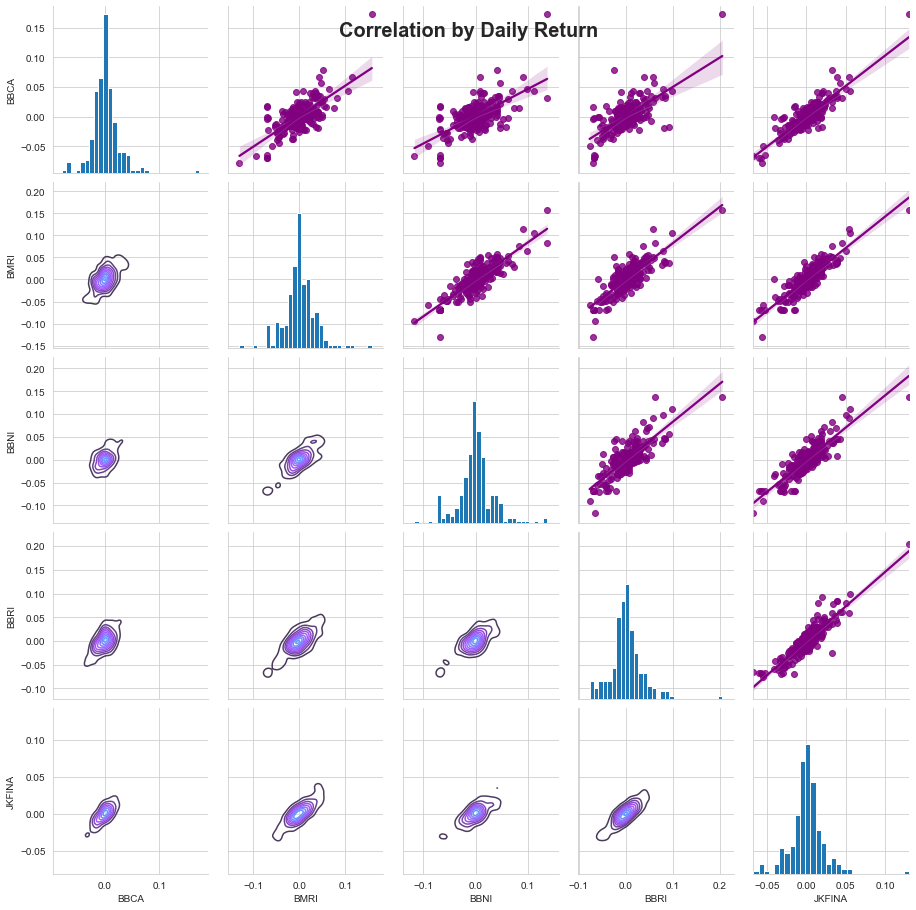

In [14]:
returns_fig = sns.PairGrid(fin_rets.dropna())
returns_fig.map_upper(sns.regplot, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)
plt.suptitle('Correlation by Daily Return', weight='bold',fontsize=20)
plt.show()

Untuk melihat korelasi dua saham selain menggunakan daily return kita juga bisa menggunakan harga penutupan seperti yang dapat dilihat dibawah ini.

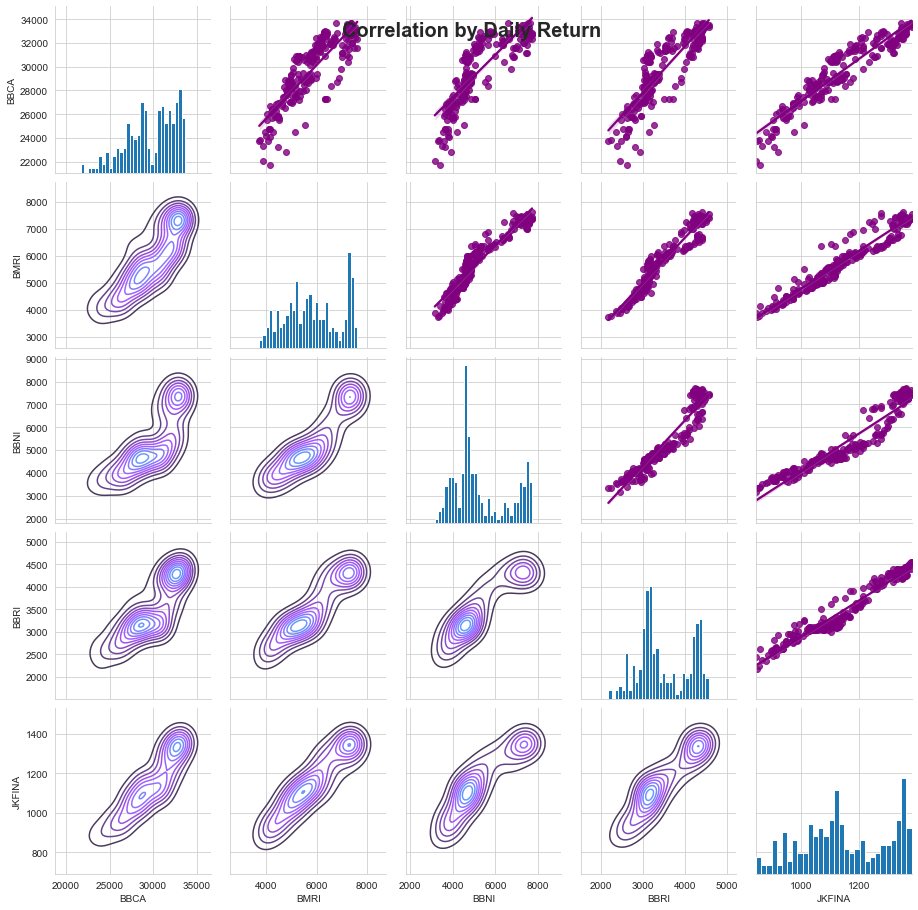

In [15]:
returns_fig = sns.PairGrid(closing_prices.dropna())
returns_fig.map_upper(sns.regplot, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)
plt.suptitle('Correlation by Daily Return', weight='bold',fontsize=20)
plt.show()

Dari kedua grafik diatas terlihat bahwa ketika return suatu saham/ indeks tinggi maka saham/indeks lain cenderung tinggi pula. Untuk mengetahui nilai numerik dari korelasi antar saham diatas dapat kita ringkas dengan menggunakan visualisasi heatmap dibawah ini.

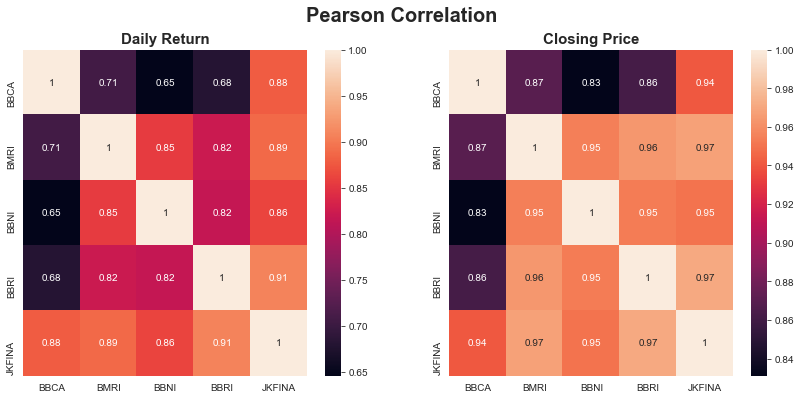

In [16]:
corr = [fin_rets.dropna().corr(), closing_prices.dropna().corr()]
var = ['Daily Return', 'Closing Price']
f, axes = plt.subplots(1, 2, figsize=(14,6))
ax = axes.flat

for i in range(len(corr)):
    sns.heatmap(corr[i], annot=True, ax=ax[i]).set_title(var[i], weight='bold', fontsize=15)
    
plt.suptitle('Pearson Correlation', weight='bold',fontsize=20)
plt.show()

Pada kedua heatmap diatas terlihat bahwa korelasi terbesar terjadi antara saham BBRI dengan indeks JKFINA. Secara keseluruhan korelasi bernilai positif yang artinya setiap kenaikan suatu saham atau indeks maka saham lain atau indeks akan cenderung mengalami kenaikan juga, begitupun sebaliknya. Nilai-nilai korelasi semua saham dengan indeks JKFINA terbilang sangat tinggi, hal ini disebabkan karena keempat perusahaan tersebut termasuk ke dalam perusahaan dengan kapitalisasi pasar yang besar sehingga sangat berpengaruh terhadap pergerakan indeks JKFINA.

## RISK ANALYSIS
Berikutnya akan dilakukan analisis risikoo terhadap saham-saham tersebut. Salah satu cara mengukur risiko yang paling dasar adalah menggunakan informasi daily return kemudian membandingkan pengembalian yang diharapkannya dengan standar deviasinya.

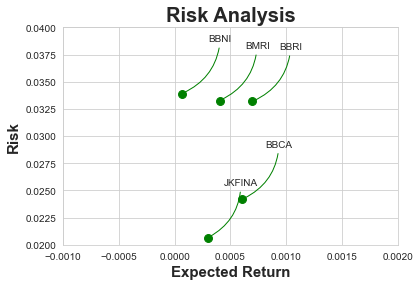

In [17]:
rets = fin_rets.dropna()
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area, color='green')
plt.xlim(-0.001,0.002)
plt.ylim(0.02,0.04)
plt.xlabel('Expected Return', weight='bold', fontsize=15)
plt.ylabel('Risk', weight='bold', fontsize=15)
plt.title('Risk Analysis', weight='bold', fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext=(50,50), fontsize=10,
        textcoords = 'offset points', ha='right', va='bottom',
        arrowprops = dict(arrowstyle='-', connectionstyle='arc3,rad=-0.3', color='green'))

Dari grafik diatas terlihat bahwa saham BBRI memiliki expected return paling tinggi dibanding saham lainnya. Berdasarkan expected return tersebut saham BBRI terlihat lebih baik dibandingkan saham BMRI dan BBNI karena mampu memberikan expected return yang lebih tinggi dengan risiko yang tidak jauh berbeda. Namun jika dilihat secara keseluruhan saham BBCA lebih aman untuk berinvestasi karena walaupun expected returnnya sedikit rendah dibanding BBRI namun BBCA memiliki risko yang paling rendah dibanding saham yang lain.

### Value at Risk

Selanjutnya kita akan menentukan parameter Value at Risk untuk saham-saham tersebut. Value at Risk dapat diartikan sebagai jumlah uang yang kita perkirakan akan hilang (alias berisiko) untuk interval kepercayaan tertentu. Ada beberapa metode yang dapat kita gunakan untuk memperkirakan Value at Risk ini salah satunya dengan menggunakan nilai quantil saham tersebut.

In [18]:
quant = []
for stock in code_all:
    quant1 = rets[stock].quantile(0.05)
    quant.append(quant1)

quantile_stock = pd.DataFrame({'Stock' : code_all, 'Quantile 5%': quant})
quantile_stock

,Stock,Quantile 5%
0,BBCA,-0.033386
1,BMRI,-0.052009
2,BBNI,-0.067669
3,BBRI,-0.054348
4,JKFINA,-0.032236


Kuantil empiris 0,05 dari daily return keempat saham tersebut berada di sekitar -0.067 sampai -0.032. Kita ambil contoh BBCA dengan quantile -0.033  berarti bahwa dengan keyakinan 95%, kerugian harian terburuk pada saham BBCA tidak akan melebihi 3,3% sehingga jika kita memiliki investasi 1 juta rupiah pada saham BBCA maka VaR 5% satu hari kita adalah 0.033 * Rp1,000,000.00 = Rp33,000.00

#### Monte Carlo
Selain menggunakan quantil saham, metode Monte Carlo dapat digunakan untuk menentukan parameter Value at Risk dengan menjalankan banyak uji coba pada kondisi pasar acak. Kali ini kita akan menghitung kerugian portofolio untuk setiap uji coba dan menetapkan seberapa berisiko saham-saham tersebut. Secara teknis proses rantai Markov akan digunakan pada metode ini karena informasi masa lalu tentang harga suatu saham tidak bergantung dengan harga saham di masa mendatang.

In [19]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        drift[x] = mu * dt
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

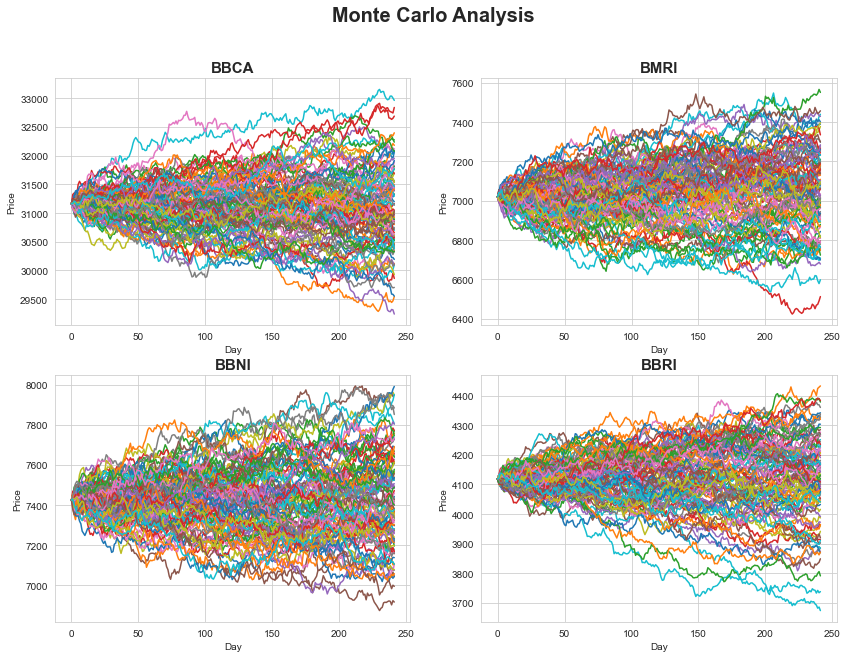

In [20]:
days = 242
dt = 1/days
start_price1 = []
mu1 = []
sigma1 = []

for stock in code_fin:
    start_price1.append(closing_prices[stock][0])
    mu1.append(rets.mean()[stock])
    sigma1.append(rets.std()[stock])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(14,10))
sb = [ax1, ax2, ax3, ax4]
for k in range(4):
    for run in range(100):
        sb[k].plot(stock_monte_carlo(start_price1[k],days,mu1[k],sigma1[k]))
    sb[k].set_title(code_fin[k], weight='bold', fontsize=15)

for m in sb:
    m.set(xlabel='Day', ylabel='Price')

plt.suptitle('Monte Carlo Analysis', weight='bold', fontsize=20)
plt.show()

Grafik diatas merupakan prediksi pergerakan harga saham selama setahun dengan 100 kali uji coba menggunakan harga awal saham satu tahun yang lalu. Selanjutnya akan dilakukan uji coba yang lebih besar dan akan kita visualisasikan harga akhir dari setiap uji coba ke dalam histogram dengan garis kuantil 5% untuk melihat VaR setiap sahamnya.

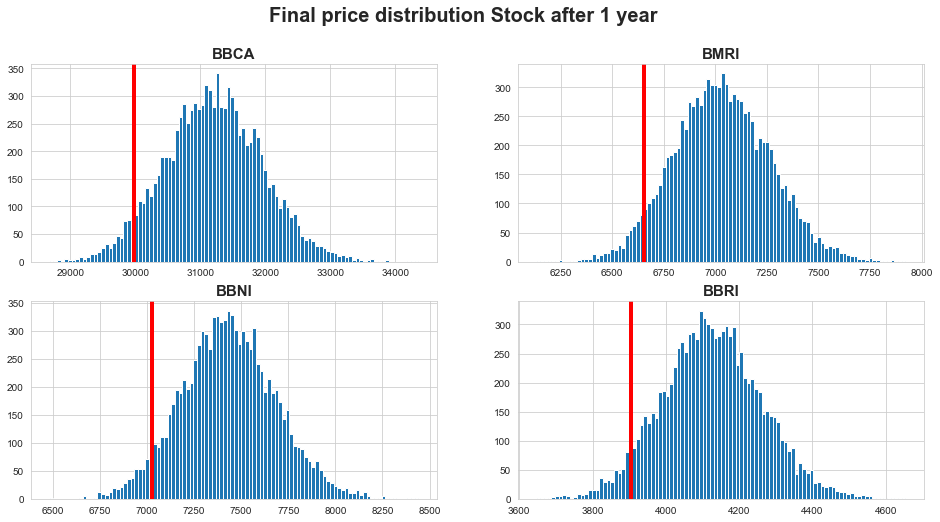

In [21]:
runs = 10000

var_sim = []
mean_sim = []
q_sim = []
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(16,8))
plt.suptitle('Final price distribution Stock after 1 year', weight='bold', fontsize=20)
sb = [ax1, ax2, ax3, ax4]
for k in range(len(code_fin)):
    np.set_printoptions(threshold=5)
    simulations = np.zeros(runs)
    for run in range(runs):    
        simulations[run] = stock_monte_carlo(start_price1[k],days,mu1[k],sigma1[k])[days-1];
    
    q = np.percentile(simulations,5)
    var_sim.append(start_price1[k]-q)
    mean_sim.append(simulations.mean())
    q_sim.append(q)
    sb[k].hist(simulations,bins=100)
    sb[k].axvline(x=q, lw=4, color='r')
    sb[k].set_title(code_fin[k], weight='bold', fontsize=15)

In [22]:
sum_sim = pd.DataFrame({'Stock' : code_fin, 'Start Price': start_price1, 'Mean Final Price': mean_sim, 'q': q_sim, 'VaR(0.95)':var_sim})
sum_sim

,Stock,Start Price,Mean Final Price,q,VaR(0.95)
0,BBCA,31165.201172,31201.478760,29978.929428,1186.271744
1,BMRI,7020.456055,7030.026625,6653.165498,367.290557
2,BBNI,7425.410156,7432.490278,7028.075027,397.335129
3,BBRI,4119.307129,4124.812891,3904.517822,214.789307


Berdasarkan histogram dan dataframe diatas terlihat bahwa dengan menggunakan metode Monte Carlo nilai VaR(0.95) yang didapatkan  cenderung lebih rendah dibanding langsung menggunakan metode kuantil pada daily returnnya. Contoh pada saham BBCA untuk investasi sebesar Rp31.165,00 maka sebesar Rp1.198,03 ditempatkan pada risiko 95% simulasi Monte Carlo.

Berdasarkan seluruh aspek yang telah kita analisis dapat disimpulkan bahwa keempat saham tersebut memiliki kinerja yang baik karena mampu memberikan return yang lebih tinggi dibanding indeksnya yang merupakan rata-rata pergerakan seluruh saham di sektor finance. Saham BBCA cenderung menjadi pilihan investasi yang lebih baik dibanding saham lainnya karena walaupun memiliki rata-rata return yang sedikit lebih rendah dibanding BBRI namun memiliki risiko yang lebih baik dibanding saham-saham lainnya. Jika dilihat dari sisi volume perdagangannya, saham BBCA memang menjadi saham yang paling rendah volumenya namun meski demikian saham BBCA masih termasuk ke dalam saham yang likuid sehingga layak untuk menjadi bagian dalam portofolio seorang investor. 